In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 13)

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df['bmi'] = np.round((df['weight']/df['height']/df['height'])*10000,1)

In [7]:
df['blood_pressure'] = df['ap_hi'] - df['ap_lo']

In [8]:
df['age'] = np.floor(df['age']/365)
df['age'] = df['age'].astype(int)

In [9]:
categorical = {'gender','cholesterol','gluc','smoke','alco','active'}

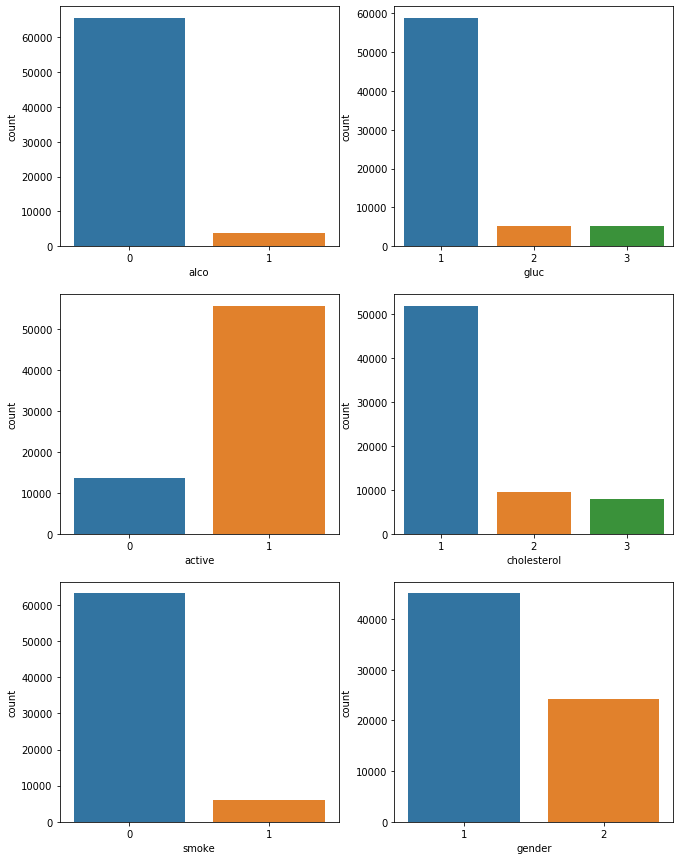

In [19]:
fig, ax=plt.subplots(3, 2, figsize=(11,15))
for i,subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[i],ax=subplot)

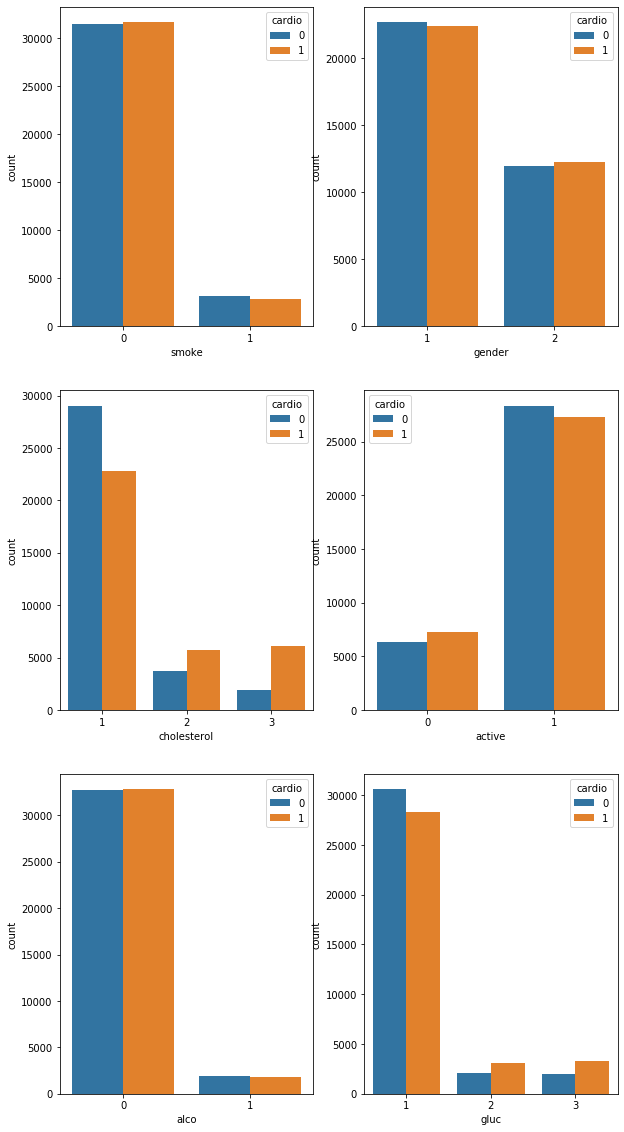

In [43]:
fig,axes = plt.subplots(3,2,figsize=(10,20))
for i, j in enumerate(categorical):
    row,col = i//2,i%2
    sns.countplot(x=j,data=df,hue='cardio',ax=axes[row,col])

In [21]:
x = df.drop('cardio', axis = 1)
y = df['cardio']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgbparams = {'booster':['gbtree', 'gblinear', 'dart'], 'max_depth' : [3,4,5,6], 'learning_rate' : [0.1, 0.3, 0.5], 
            'n_estimators' : [x for x in range(1,10)]}

grid = GridSearchCV(estimator=xgb, param_grid= xgbparams, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6]

In [27]:
grid.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 9}

In [28]:
grid.best_score_

0.7350855493712636

In [31]:
xgb = XGBClassifier(booster= 'gbtree', learning_rate= 0.3, max_depth= 5, n_estimators= 9)
y_pred = xgb.fit(x_train, y_train).predict(x_test)
print('Training Score is', xgb.score(x_train, y_train))
print('Test Score is', xgb.score(x_test, y_test))
print('Accuracy is ',accuracy_score(y_test, y_pred))

Training Score is 0.7397237682951968
Test Score is 0.7345005050262132
Accuracy is  0.7345005050262132


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10411
           1       0.76      0.68      0.72     10380

    accuracy                           0.73     20791
   macro avg       0.74      0.73      0.73     20791
weighted avg       0.74      0.73      0.73     20791



In [33]:
print(confusion_matrix(y_test, y_pred))

[[8220 2191]
 [3329 7051]]
